In [4]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn

In [18]:
#Set graph color
COLOR = 'w'
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

In [19]:
X = np.array([[0,1,0,1],
              [1,0,1,1],
              [0,0,0,1],
              [1,0,1,0]])

y=np.array([0,1,0,1])

In [20]:
counts={}
for label in np.unique(y):
    #Loop each class
    #Count '1' each attribute
    counts[label] = X[y==label].sum(axis=0)
print('Attribute count : \n{}'.format(counts))

Attribute count : 
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


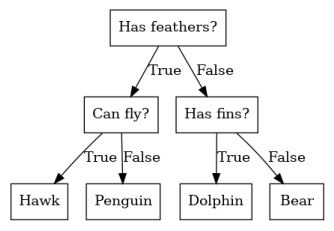

In [21]:
mglearn.plots.plot_animal_tree()

In [22]:
import pandas as pd
import os

In [23]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))

Text(0, 0.5, 'Price ($/Mbyte_)')

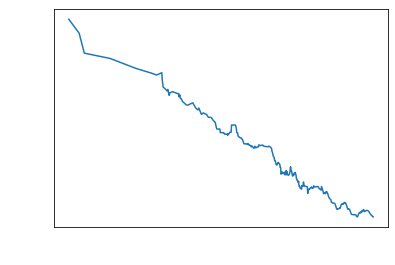

In [25]:
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('Year')
plt.ylabel('Price ($/Mbyte_)')

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [32]:
#Make pre-2000 train data, 2000 later as test data
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

In [33]:
#Using just date attribute for predict to price
X_train = data_train.date[:, np.newaxis]

In [34]:
#Change to log scale for simple to relationship between data and target
y_train = np.log(data_train.price)

In [35]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

In [37]:
#Predict about all date
X_all = ram_prices.date[:, np.newaxis]

In [38]:
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

In [39]:
#Return the log scale of predicted value
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

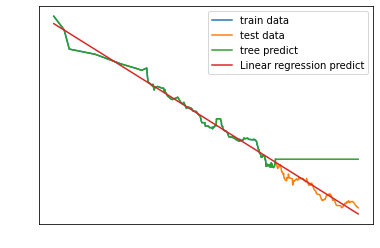

In [40]:
#display graph
plt.semilogy(data_train.date, data_train.price, label='train data')
plt.semilogy(data_test.date, data_test.price, label='test data')
plt.semilogy(ram_prices.date, price_tree, label='tree predict')
plt.semilogy(ram_prices.date, price_lr, label='Linear regression predict')
plt.legend()